In [74]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
from allensdk.brain_observatory.ecephys import ecephys_session
%matplotlib notebook

In [2]:
manifest_path = os.path.join(
    "/",
    "allen",
    "aibs",
    "informatics",
    "nileg",
    "swdb_ecephys",
    "cache_dir",
    "manifest.json"
)

lims_config = {
    "pg_kwargs": {
        "dbname": "lims2_nileg",
        "host": "aibsdc-dev-db1",
        "port": 5432,
        "user": "limsreader",
        "password": "limsro"
    },
    "app_kwargs": {
        "host": "10.128.50.64:3000"
    }
}

cache = EcephysProjectCache.from_lims(manifest=manifest_path, lims_kwargs=lims_config)

In [3]:
swdb_ids = set([
    732592105,
    737581020,
    739448407,
    744228101,
    746083955,
    750332458,
    750749662,
    751348571,
    754312389,
    754829445,
    755434585,
    756029989,
    757216464,
    757970808,
    758798717,
    759883607,
    760345702,
    760693773,
    761418226,
    762120172,
    762602078,
    773418906,
])

sessions = cache.get_sessions()
sessions = sessions[
    (sessions.index.isin(swdb_ids))
    & (sessions["has_nwb"])
]
sessions

,stimulus_set_name,specimen_id,genotype,gender,age,project_code,probe_count,channel_count,unit_count,has_nwb,channel_structure_acronyms
id,,,,,,,,,,,
744228101,brain_observatory_1.1,719817805,NaN,M,P122,NeuropixelVisualCoding,6,900,2399,True,"['CA', 'DG', 'MB', 'TH', 'VIS', 'VISal', 'VISl..."
746083955,brain_observatory_1.1,726170935,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,F,P98,NeuropixelVisualCoding,6,754,1889,True,"['CA', 'DG', 'MB', 'TH', 'VISal', 'VISl', 'VIS..."
751348571,brain_observatory_1.1,732548380,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,F,P93,NeuropixelVisualCoding,6,934,2426,True,"['CA', 'DG', 'MB', 'TH', 'VISam', 'VISl', 'VIS..."
754829445,brain_observatory_1.1,726298253,NaN,M,unknown,NeuropixelVisualCoding,5,869,2116,True,"['CA', 'DG', 'MB', 'TH', 'VIS', 'VISam', 'VISl..."
755434585,brain_observatory_1.1,730760270,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,M,unknown,NeuropixelVisualCoding,6,775,1900,True,"['CA', 'DG', 'MB', 'TH', 'VISal', 'VISam', 'VI..."
756029989,brain_observatory_1.1,734865738,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,M,unknown,NeuropixelVisualCoding,6,812,2010,True,"['CA', 'DG', 'MB', 'TH', 'VISal', 'VISam', 'VI..."
757216464,brain_observatory_1.1,733457989,NaN,M,unknown,NeuropixelVisualCoding,6,995,2597,True,"['CA', 'DG', 'MB', 'TH', 'VIS', 'VISal', 'VISa..."
758798717,brain_observatory_1.1,735109609,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,M,unknown,NeuropixelVisualCoding,5,644,1610,True,"['CA', 'DG', 'MB', 'TH', 'VISal', 'VISam', 'VI..."
759883607,brain_observatory_1.1,740268986,NaN,M,unknown,NeuropixelVisualCoding,5,725,1810,True,"['CA', 'DG', 'MB', 'TH', 'VISal', 'VISam', 'VI..."


# Exploring an experimental session

In [4]:
sessions.head()

,stimulus_set_name,specimen_id,genotype,gender,age,project_code,probe_count,channel_count,unit_count,has_nwb,channel_structure_acronyms
id,,,,,,,,,,,
744228101,brain_observatory_1.1,719817805,NaN,M,P122,NeuropixelVisualCoding,6,900,2399,True,"['CA', 'DG', 'MB', 'TH', 'VIS', 'VISal', 'VISl..."
746083955,brain_observatory_1.1,726170935,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,F,P98,NeuropixelVisualCoding,6,754,1889,True,"['CA', 'DG', 'MB', 'TH', 'VISal', 'VISl', 'VIS..."
751348571,brain_observatory_1.1,732548380,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,F,P93,NeuropixelVisualCoding,6,934,2426,True,"['CA', 'DG', 'MB', 'TH', 'VISam', 'VISl', 'VIS..."
754829445,brain_observatory_1.1,726298253,NaN,M,unknown,NeuropixelVisualCoding,5,869,2116,True,"['CA', 'DG', 'MB', 'TH', 'VIS', 'VISam', 'VISl..."
755434585,brain_observatory_1.1,730760270,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,M,unknown,NeuropixelVisualCoding,6,775,1900,True,"['CA', 'DG', 'MB', 'TH', 'VISal', 'VISam', 'VI..."


***Here's where I'd like to explore some dimensions of the dataset in terms of stimuli, cre lines, other metadata.  Ultimately I want to use this to select a particular session, rather than pull one arbitrarily***

In [5]:
session_id = 744228101 # for example
session = cache.get_session_data(session_id)

## Getting data for a session

Start by exploring tab completion...

In [6]:
# session.

### Units

In [7]:
session.units.head()

,cluster_id,firing_rate,isi_violations,local_index_unit,peak_channel_id,quality,snr,channel_local_index,structure_acronym,structure_id,probe_horizontal_position,probe_id,probe_vertical_position,valid_data,probe_description,location,sampling_rate
unit_id,,,,,,,,,,,,,,,,,
914619041,1,0.032408,0.000000,1,849743020,good,2.932975,1,TH,549.0,11,757904508,20,True,probeA,,30000.0
914619039,0,2.706910,3.368414,0,849743020,good,2.626409,1,TH,549.0,11,757904508,20,True,probeA,,30000.0
914619865,421,0.026816,0.000000,413,849743024,good,4.005020,3,TH,549.0,27,757904508,40,True,probeA,,30000.0
914619055,9,0.869620,9.698823,8,849743024,good,1.273870,3,TH,549.0,27,757904508,40,True,probeA,,30000.0
914619053,8,0.016980,134.593695,7,849743024,good,3.585714,3,TH,549.0,27,757904508,40,True,probeA,,30000.0


In [8]:
session.units.sampling_rate.unique()

array([30000.])

In [9]:
#what is firing_rate? mean firing rate across the entire session? baseline firing rate during some window?

How many units are in this session?

In [10]:
len(session.units)

2399

Which areas (structures) are they from?

In [11]:
print(session.units.structure_acronym.unique())

['TH' 'DG' 'CA' 'VIS' 'None' 'MB' 'VISp' 'VISl' 'VISal' 'VISrl']


***Nile add link to brainmap.org for a specific structure acronym***

how many units per area are there?

In [12]:
session.units.structure_acronym.value_counts()

CA       662
TH       530
DG       293
VIS      282
VISl     168
VISrl    117
VISp     115
VISal    107
MB       107
None      18
Name: structure_acronym, dtype: int64

### Spike times

In [13]:
spike_times = session.spike_times

What type of object is this?

In [14]:
type(spike_times)

dict

In [15]:
len(spike_times)

2399

In [16]:
len(session.units)

2399

In [17]:
list(spike_times.keys())[:5]

[914620571, 914620569, 914619889, 914619885, 914619897]

Use the unit_id for the first unit to get the spike times for that unit. How many spikes does it have in the entire session?

In [18]:
spike_times[session.units.index[0]]

array([  49.86647487,  103.13360849,  105.67104501,  105.71054506,
        121.74253187,  129.85580874,  226.25109655,  279.56753022,
        287.85387397,  436.91302797,  462.30155988, 1350.30004256,
       1686.87713223, 1788.25259297, 1895.80522814, 2032.93780049,
       2037.06930568, 2282.99544809, 2394.49488822, 2402.98923223,
       2403.02646561, 2415.01194734, 2819.8033894 , 2868.7882843 ,
       2882.86400199, 2909.35800195, 2909.4467354 , 2909.49046878,
       2909.50603547, 2909.50856881, 2909.52086882, 2909.5832689 ,
       2909.65176899, 2909.69273571, 2909.8220692 , 2909.926736  ,
       2910.20760302, 2938.83213899, 2938.88780573, 2941.12957521,
       2941.1478419 , 2941.15727525, 2941.27224206, 2941.32427546,
       2941.33607547, 2941.36114217, 2941.39087554, 2941.45484229,
       2941.45990896, 2941.48507566, 2941.49114234, 2941.69747593,
       2941.71954262, 2941.88994284, 2949.78271942, 2950.38538685,
       2950.43478691, 2950.46258694, 2950.47668696, 2950.51132

In [19]:
print(len(spike_times[session.units.index[0]]))

313


Make a raster plot for the first 100 units

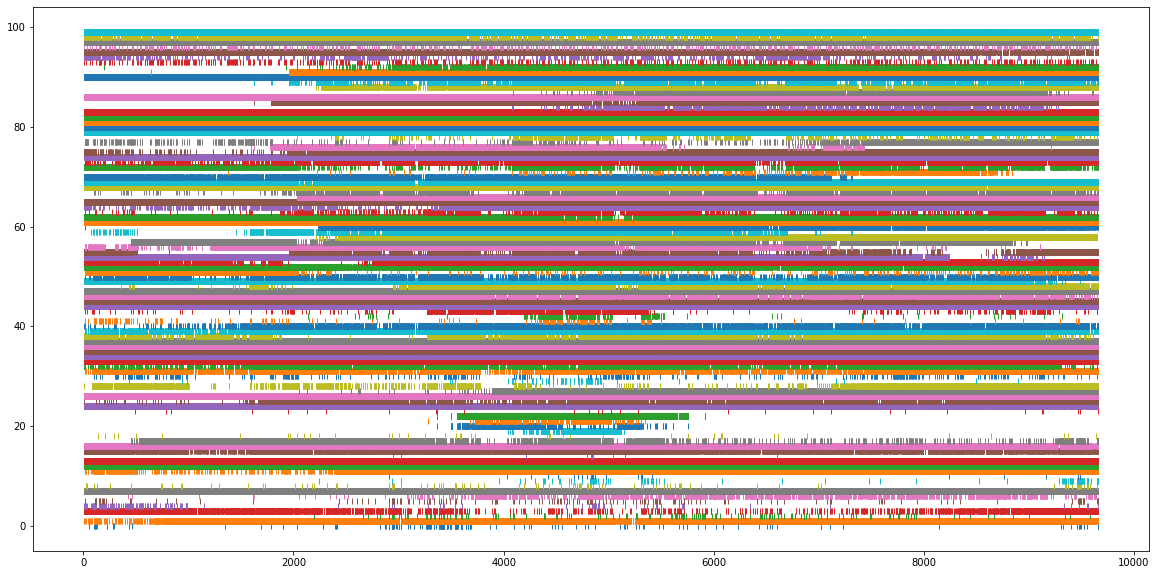

In [20]:
plt.figure(figsize=(20,10))
for i in range(100):
    plt.plot(spike_times[session.units.index[i]], np.repeat(i,len(spike_times[session.units.index[i]])), '|')#, color='gray')
# plt.xlim(2000,2250)

### Stimulus presentations

What else can we learn about the session?

In [21]:
session.stimulus_names

/allen/aibs/informatics/nileg/swdb_ecephys/env/swdb37/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


['spontaneous_activity',
 'gabor_20_deg_250ms',
 'flash_250ms',
 'drifting_gratings',
 'natural_movie_3',
 'natural_movie_1',
 'static_gratings',
 'Natural Images']

In [22]:
stim_pres = session.stimulus_presentations
stim_pres.head()

,Color,Contrast,Image,Ori,Phase,Pos_x,Pos_y,SF,TF,start_time,stimulus_block,stimulus_name,stop_time,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.567300,NaN,spontaneous_activity,84.634040,60.066740,0
1,NaN,0.8,NaN,90.0,NaN,-20.0,30.0,0.08,4.0,84.634040,0.0,gabor_20_deg_250ms,84.867567,0.233527,1
2,NaN,0.8,NaN,90.0,NaN,40.0,-20.0,0.08,4.0,84.867567,0.0,gabor_20_deg_250ms,85.117775,0.250208,2
3,NaN,0.8,NaN,90.0,NaN,20.0,-40.0,0.08,4.0,85.117775,0.0,gabor_20_deg_250ms,85.367983,0.250208,3
4,NaN,0.8,NaN,90.0,NaN,-40.0,-30.0,0.08,4.0,85.367983,0.0,gabor_20_deg_250ms,85.618191,0.250208,4


***need to fix the stimulus names?***

***Explain epochs vs presentations***

In [23]:
#where is the stimulus epochs? replace function below when function exists in sdk

In [24]:
stimulus_epochs = session.get_stimulus_epochs()
stimulus_epochs.head()

,start_time,stop_time,duration,stimulus_name,stimulus_block
1,84.634040,996.629133,911.995093,gabor_20_deg_250ms,0.0
2,996.629133,1285.620550,288.991417,spontaneous_activity,NaN
3,1285.620550,1584.119875,298.499325,flash_250ms,1.0
5,1585.871400,2185.372171,599.500771,drifting_gratings,2.0
7,2216.398120,2816.899750,600.501630,natural_movie_3,3.0


In [25]:
len(stimulus_epochs.stimulus_name.unique())

8

Shade each stimulus with a unique color. The plt.axvspan() is a useful function for this.

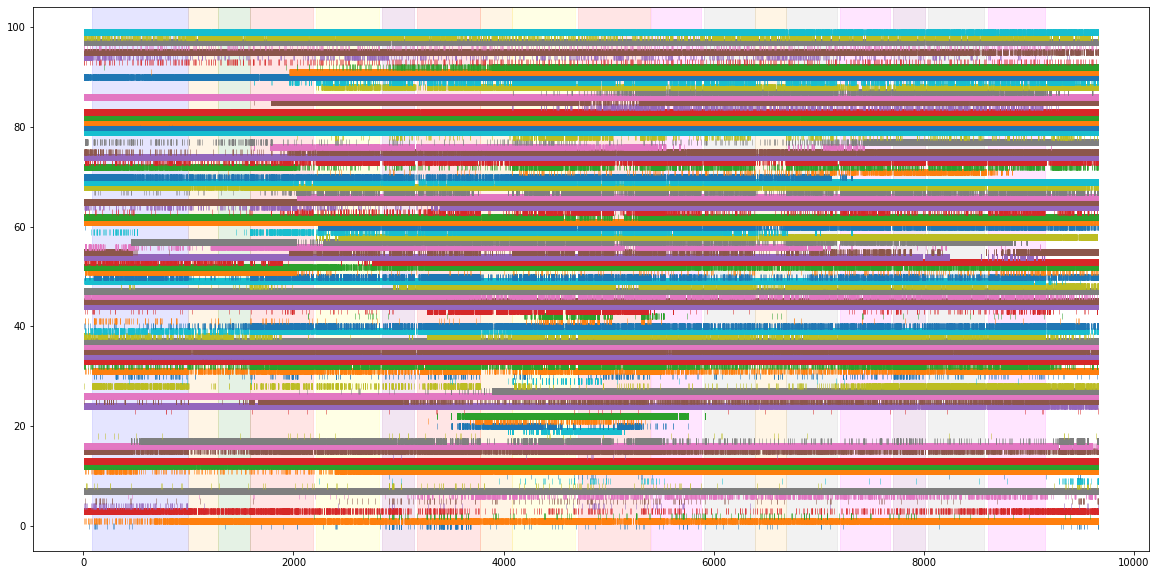

In [26]:
plt.figure(figsize=(20,10))
for i in range(100):
    plt.plot(spike_times[session.units.index[i]], np.repeat(i,len(spike_times[session.units.index[i]])), '|', alpha=0.5)#, color='gray')

colors = ['blue','orange','green','red','yellow','purple','magenta','gray','lightblue']
for c,stim_name in enumerate(stimulus_epochs["stimulus_name"].unique()):
    stim = stimulus_epochs[stimulus_epochs["stimulus_name"] == stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim["start_time"].iloc[j], xmax=stim["stop_time"].iloc[j], color=colors[c], alpha=0.1)
# plt.xlim(6000,7000)

### Get the running speed

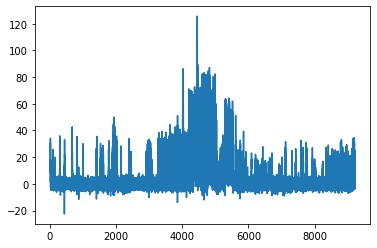

In [27]:
plt.plot(session.running_speed.end_time, session.running_speed.velocity)

Add the running speed to the visualization. 

(6000, 8000)

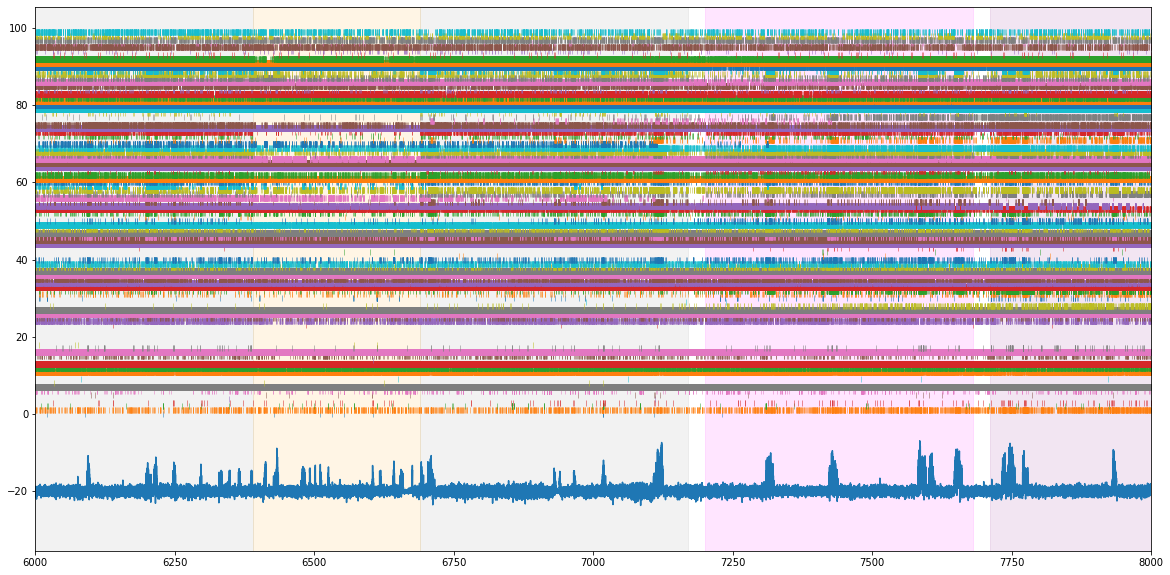

In [28]:
plt.figure(figsize=(20,10))
for i in range(100):
    plt.plot(spike_times[session.units.index[i]], np.repeat(i,len(spike_times[session.units.index[i]])), '|', alpha=0.5)#, color='gray')
plt.plot(session.running_speed.end_time, (0.4*session.running_speed.velocity)-20)
    
    
colors = ['blue','orange','green','red','yellow','purple','magenta','gray','lightblue']
for c,stim_name in enumerate(stimulus_epochs["stimulus_name"].unique()):
    stim = stimulus_epochs[stimulus_epochs["stimulus_name"]==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim["start_time"].iloc[j], xmax=stim["stop_time"].iloc[j], color=colors[c], alpha=0.1)
        


plt.xlim(6000,8000)

(6000, 8000)

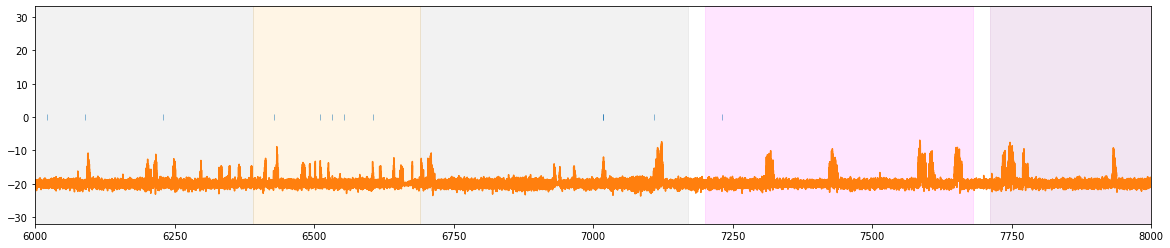

In [29]:
plt.figure(figsize=(20,4))
i=0
plt.plot(spike_times[session.units.index[i]], np.repeat(i,len(spike_times[session.units.index[i]])), '|', alpha=0.5)#, color='gray')
plt.plot(session.running_speed.end_time, (0.4*session.running_speed.velocity)-20)
    
    
colors = ['blue','orange','green','red','yellow','purple','magenta','gray','lightblue']
for c,stim_name in enumerate(stimulus_epochs["stimulus_name"].unique()):
    stim = stimulus_epochs[stimulus_epochs["stimulus_name"]==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim["start_time"].iloc[j], xmax=stim["stop_time"].iloc[j], color=colors[c], alpha=0.1)
        


plt.xlim(6000,8000)

(6000, 8000)

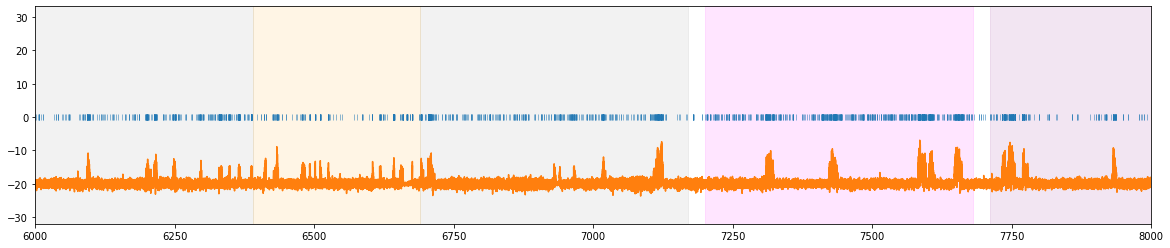

In [30]:
plt.figure(figsize=(20,4))
i=40
plt.plot(spike_times[session.units.index[i]], np.repeat(0,len(spike_times[session.units.index[i]])), '|', alpha=0.5)#, color='gray')
plt.plot(session.running_speed.end_time, (0.4*session.running_speed.velocity)-20)
    
    
colors = ['blue','orange','green','red','yellow','purple','magenta','gray','lightblue']
for c,stim_name in enumerate(stimulus_epochs["stimulus_name"].unique()):
    stim = stimulus_epochs[stimulus_epochs["stimulus_name"]==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim["start_time"].iloc[j], xmax=stim["stop_time"].iloc[j], color=colors[c], alpha=0.1)
        


plt.xlim(6000,8000)

(6000, 8000)

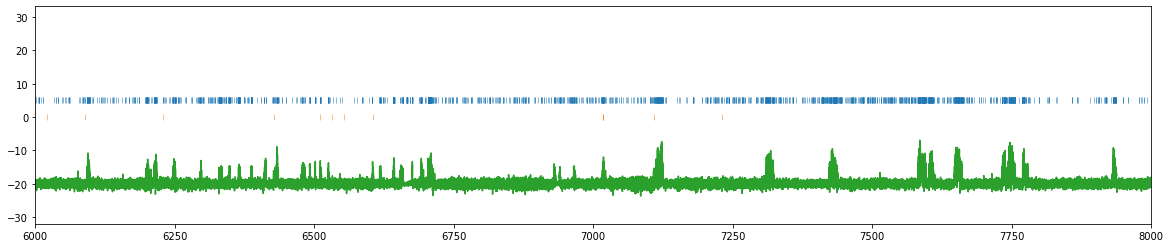

In [31]:
plt.figure(figsize=(20,4))
plt.plot(spike_times[session.units.index[40]], np.repeat(5,len(spike_times[session.units.index[40]])), '|', alpha=0.5)#, color='gray')
plt.plot(spike_times[session.units.index[0]], np.repeat(0,len(spike_times[session.units.index[0]])), '|', alpha=0.5)#, color='gray')
plt.plot(session.running_speed.end_time, (0.4*session.running_speed.velocity)-20)
plt.xlim(6000,8000)

# Exploring units

## Plotting and sorting units

### create a function to plot the raster plot

*** replace with call to api?***

In [32]:
import allensdk.brain_observatory.ecephys.visualization as ecvis
# ecvis.raster_plot()

In [33]:
def plot_raster(spike_times, start, end):
    num_units = len(spike_times)
    ystep = 1 / num_units

    ymin = 0
    ymax = ystep

    for unit_id, unit_spike_times in spike_times.items():
        unit_spike_times = unit_spike_times[np.logical_and(unit_spike_times >= start, unit_spike_times < end)]
        plt.vlines(unit_spike_times, ymin=ymin, ymax=ymax)

        ymin += ystep
        ymax += ystep
        

Select a single stimulus presentation

In [34]:
drifting_gratings_presentation_onsets = session.stimulus_presentations.loc[
    session.stimulus_presentations["stimulus_name"] == "drifting_gratings", 
    "start_time"
].values
start, end = drifting_gratings_presentation_onsets[:2]

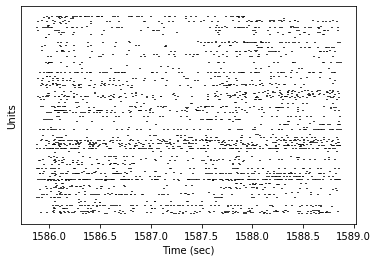

In [35]:
plot_raster(session.spike_times, start, end)
plt.xlabel('Time (sec)')
plt.ylabel('Units')
plt.tick_params(axis="y", labelleft=False, left=False)
plt.show()

### arrange neurons by their firing rate

*** Comments: 1) remove hide the quality column; 2) remove sampling rate column - it is the same!  3) remove valid_data ***

In [36]:
session.units.sort_values(by="firing_rate", ascending=False).head()

,cluster_id,firing_rate,isi_violations,local_index_unit,peak_channel_id,quality,snr,channel_local_index,structure_acronym,structure_id,probe_horizontal_position,probe_id,probe_vertical_position,valid_data,probe_description,location,sampling_rate
unit_id,,,,,,,,,,,,,,,,,
914622655,31,68.922125,0.005038,30,849745842,good,5.269712,50,TH,549.0,59,757904520,520,True,probeE,,30000.0
914619093,28,67.937806,0.005373,27,849743050,good,2.035620,16,TH,549.0,43,757904508,180,True,probeA,,30000.0
914619119,41,63.862635,0.026690,40,849743078,good,2.416808,30,TH,549.0,59,757904508,320,True,probeA,,30000.0
914619127,45,53.072062,0.001185,44,849743084,good,4.214614,33,TH,549.0,11,757904508,340,True,probeA,,30000.0
914622665,36,51.866227,0.004061,35,849745860,good,1.398654,59,TH,549.0,27,757904520,600,True,probeE,,30000.0


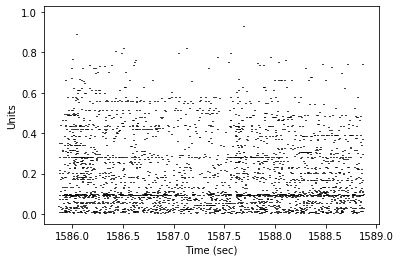

In [37]:
by_fr = session.units.sort_values(by="firing_rate", ascending=False)
spike_times_by_firing_rate = {
    uid: session.spike_times[uid] for uid in by_fr.index.values
}

plot_raster(spike_times_by_firing_rate, start, end)
plt.ylabel('Units')
plt.xlabel('Time (sec)')
plt.show()


## QC Metrics

### show the qc metrics of differnet units

In [38]:
session.units.head()

,cluster_id,firing_rate,isi_violations,local_index_unit,peak_channel_id,quality,snr,channel_local_index,structure_acronym,structure_id,probe_horizontal_position,probe_id,probe_vertical_position,valid_data,probe_description,location,sampling_rate
unit_id,,,,,,,,,,,,,,,,,
914619041,1,0.032408,0.000000,1,849743020,good,2.932975,1,TH,549.0,11,757904508,20,True,probeA,,30000.0
914619039,0,2.706910,3.368414,0,849743020,good,2.626409,1,TH,549.0,11,757904508,20,True,probeA,,30000.0
914619865,421,0.026816,0.000000,413,849743024,good,4.005020,3,TH,549.0,27,757904508,40,True,probeA,,30000.0
914619055,9,0.869620,9.698823,8,849743024,good,1.273870,3,TH,549.0,27,757904508,40,True,probeA,,30000.0
914619053,8,0.016980,134.593695,7,849743024,good,3.585714,3,TH,549.0,27,757904508,40,True,probeA,,30000.0


### narrow down the session parameters

In [39]:
session_params = session.units.loc[:, ["structure_acronym", "probe_id","firing_rate", "isi_violations", "snr",'probe_vertical_position']]
session_params.head()

,structure_acronym,probe_id,firing_rate,isi_violations,snr,probe_vertical_position
unit_id,,,,,,
914619041,TH,757904508,0.032408,0.000000,2.932975,20
914619039,TH,757904508,2.706910,3.368414,2.626409,20
914619865,TH,757904508,0.026816,0.000000,4.005020,40
914619055,TH,757904508,0.869620,9.698823,1.273870,40
914619053,TH,757904508,0.016980,134.593695,3.585714,40


### sort the current session parameters by ISI violations

In [40]:
session_params.sort_values(by="isi_violations").head()

,structure_acronym,probe_id,firing_rate,isi_violations,snr,probe_vertical_position
unit_id,,,,,,
914619041,TH,757904508,0.032408,0.0,2.932975,20
914620625,VIS,757904510,0.550825,0.0,3.071031,2960
914620471,VIS,757904510,18.241102,0.0,5.978822,2960
914620647,VIS,757904510,0.033132,0.0,3.110137,3000
914620629,VIS,757904510,0.030337,0.0,3.921945,3000


### describe what is the isi violation? write the down the equation for that!
Metrics

1) ISI violation: equation, then plot spike train with the clear spike violation!
2) from Josh: get the ISI, FR etc as metrics where the data is good! what are the thresholds for the good data? SNR + ISI violations

### plot the ISI violation distribution

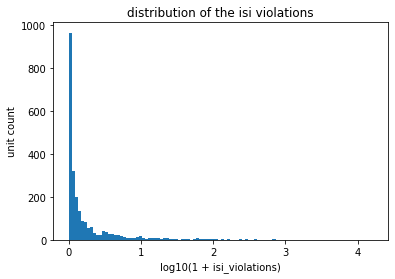

In [41]:
plt.hist(np.log10(1 + session_params["isi_violations"].values), bins=100)
plt.xlabel('log10(1 + isi_violations)')
plt.ylabel('unit count')
plt.title('distribution of the isi violations')
plt.show()

In [42]:
good_units = session_params[
    (session_params["isi_violations"] < 0.2)
    & (session_params["snr"] > 2)
]

print('Number of units with reasonable ISI and SNR:')
print(good_units.shape[0])

Number of units with reasonable ISI and SNR:
702


## Locations of units

### Brain structures

#### describe the area with reasonable qc metrics

In [43]:
good_units.structure_acronym.value_counts()

TH       222
VIS      139
CA       130
VISp      43
MB        42
DG        41
VISrl     34
VISl      29
VISal     22
Name: structure_acronym, dtype: int64


#### plot the firing rate of the units with regards to structures


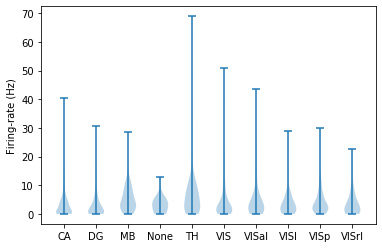

In [44]:
gb = session.units.groupby("structure_acronym")

structures = []
data = []

for group in gb:
    structure, current_data = group
    structures.append(structure)
    data.append(current_data["firing_rate"].values)

axs = plt.gca()
    
plt.violinplot(data)

axs.set_xticks(np.arange(len(structures))+1)
axs.set_xticklabels(structures)
plt.ylabel('Firing-rate (Hz)')
plt.show()


### Locations on probe

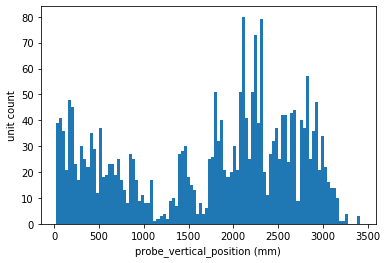

In [45]:
plt.subplots()
plt.hist(session_params["probe_vertical_position"].values, bins=100)
plt.xlabel('probe_vertical_position (mm)')
plt.ylabel('unit count')
plt.show()

## Unit waveforms

In [46]:
# neuropixel probe here! + structure boundaries

In [47]:
waveforms = session.mean_waveforms
type(waveforms)

dict

### Plot all waveforms for one unit

***Add area boundaries here?***

Text(0, 0.5, 'Channel #')

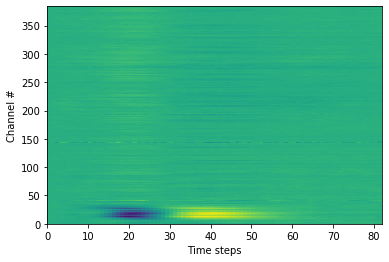

In [48]:
unit = session.units.index.values[400]
wf = session.mean_waveforms[unit]

fig, ax = plt.subplots()
plt.pcolormesh(wf)
plt.xlabel('Time steps')
plt.ylabel('Channel #')

In [49]:
session.units.loc[unit]

cluster_id                          30
firing_rate                   0.722285
isi_violations                0.223162
local_index_unit                    30
peak_channel_id              849741734
quality                           good
snr                            1.81444
channel_local_index                 21
structure_acronym                   MB
structure_id                       313
probe_horizontal_position           11
probe_id                     757904510
probe_vertical_position            220
valid_data                        True
probe_description               probeB
location                              
sampling_rate                    30000
Name: 914619945, dtype: object

### plot peak channels for all units recorded in the dentate gyrus (DG)

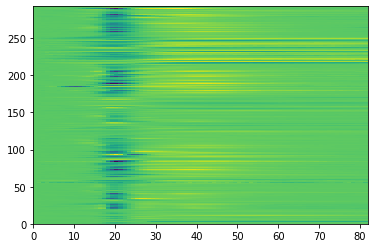

In [50]:
fig, ax = plt.subplots()

th_unit_ids = session.units[session.units["structure_acronym"] == "DG"].index.values

peak_waveforms = []

for unit_id in th_unit_ids:

    peak_ch = session.units.loc[unit_id, "peak_channel_id"]
    unit_mean_waveforms = session.mean_waveforms[unit_id]

    peak_waveforms.append(unit_mean_waveforms.loc[{"channel_id": peak_ch}])
    
    
time_domain = unit_mean_waveforms["time"]

peak_waveforms = np.array(peak_waveforms)
plt.pcolormesh(peak_waveforms)

### show the pca of the average waveforms to make sure the units make sense

***Check whether we want this here or in exercises***

In [51]:
# apply pca to the averaged waveforms

# from sklearn import decomposition
# pca = decomposition.PCA(n_components=2)
# pca.fit(peak_waveforms)


In [52]:
# fig, ax = plt.subplots()
# plt.plot(time_domain, pca.components_.T)
# plt.title('2 PCA components')


# print('Explained variance of 2 components')
# print(pca.explained_variance_ratio_)

# Spike histograms and stimulus coding

***Maybe modify to use stim rather than spontaneous to transition into stim coding?***

### create the histograms

In [53]:
spon = session.stimulus_presentations.loc[
    session.stimulus_presentations["stimulus_name"] == "spontaneous_activity", 
    ["start_time", "stop_time"]
]

In [54]:
first_spon_id = spon.index.values[0]
first_spon_duration = spon.loc[first_spon_id, "stop_time"] - spon.loc[first_spon_id, "start_time"]

# 1 - sec
time_step = 1 / 100
time_domain = np.arange(0.0, first_spon_duration + time_step, time_step)

histograms = session.presentationwise_spike_counts(
    bin_edges=time_domain,
    stimulus_presentation_ids=spon.index,
    unit_ids=None
)

print(histograms)

<xarray.DataArray 'spike_counts' (stimulus_presentation_id: 15, time_relative_to_stimulus_onset: 6007, unit_id: 2399)>
array([[[0, 0, ..., 0, 0],
        [0, 0, ..., 0, 0],
        ...,
        [0, 0, ..., 0, 0],
        [0, 0, ..., 0, 0]],

       [[0, 0, ..., 0, 0],
        [0, 0, ..., 0, 0],
        ...,
        [0, 0, ..., 0, 0],
        [0, 0, ..., 0, 0]],

       ...,

       [[0, 0, ..., 0, 0],
        [0, 0, ..., 0, 0],
        ...,
        [0, 0, ..., 0, 0],
        [0, 0, ..., 0, 0]],

       [[0, 0, ..., 0, 0],
        [0, 0, ..., 0, 0],
        ...,
        [0, 0, ..., 0, 0],
        [0, 0, ..., 0, 0]]], dtype=uint16)
Coordinates:
  * stimulus_presentation_id         (stimulus_presentation_id) int64 0 ... 68229
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 0.005 ... 60.06
  * unit_id                          (unit_id) int64 914619041 ... 914624351


### plot the firing rate of neurons in different units

Text(0.5, 0, 'Time (sec)')

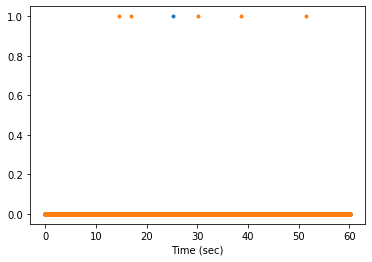

In [55]:
# spike_counts = histograms.spike_counts.values
time = histograms["time_relative_to_stimulus_onset"]

hist_train_1 = histograms[0,:,0]
hist_train_2 = histograms[0,:,1]

fig, ax = plt.subplots()

plt.plot(time, hist_train_1, '.')
plt.plot(time, hist_train_2, '.')
plt.xlabel('Time (sec)')

### compute the mean of the histograms

In [56]:
mean_histograms = histograms.mean(dim="stimulus_presentation_id")

In [57]:
mean_histograms.coords

Coordinates:
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 0.005 ... 60.06
  * unit_id                          (unit_id) int64 914619041 ... 914624351

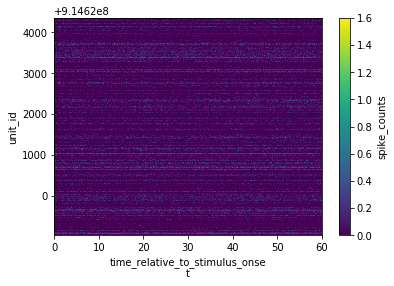

In [58]:
import xarray.plot as xrplot
xrplot.imshow(darray=mean_histograms, x="time_relative_to_stimulus_onset",
                                      y="unit_id")

### compute the correlation matrix

***Move this part to exercises?? operate on means or by trial??***

***also this is very slow!***

In [59]:
# spike_counts = mean_histograms
# num_units = spike_counts.shape[1]

# correlations = np.zeros((num_units, num_units))

# for ii in range(num_units):
#     for jj in range(num_units):
#         # normalize spike trains before computation
#         spike_train_1=spike_counts[:, ii]
# #        spike_train_1=(spike_train_1-np.mean(spike_train_1))/np.std(spike_train_1)/len(spike_train_1)
#         spike_train_2=spike_counts[:, jj]
# #        spike_train_2=(spike_train_2-np.mean(spike_train_2))/np.std(spike_train_2)/len(spike_train_2)
#         correlations[ii, jj] = np.correlate(spike_train_1, spike_train_2)
# #        np.correlate(spike_counts[:, ii], spike_counts[:, jj])

***add structure boundaries to plot here?***

In [60]:
# fig, ax = plt.subplots()
# plt.imshow(np.log10(correlations+1))

## Stimulus coding

***Construct a basic tuning curve***

## Local Field Potential (LFP)

The final aspect of a Neuropixels probe recording we will investigate is the local field potential (LFP). An LFP signal is a direct recordings of extracellular voltage from which individual spike contributions have been removed by low-pass filtering. The remaining signal reflects the population activity of a large number of cells in the vicinity of the probe, primarily through the electrical field effects of synaptic currents (along with other trans-membrane currents).

LFP can be especially informative for understanding rhythmic activity or oscillations in neural circuits, which can be identified by some simple time-series analysis of the LFP signals.

### Accessing data

We'll start by loading the LFP data from one of the probes in our session.

We need to provide this function with a probe id, which we can pull out of the `session.probes` table. 

(Note that the "id" column is the index of the dataframe, and thus must be accessed differently than other columns.)

In [61]:
probe_id = session.probes.index[0]
lfp = session.get_lfp(probe_id)
print(lfp)

<xarray.DataArray 'LFP' (time: 12072812, channel: 82)>
array([[ 289,  221,  257, ...,   31,  -25,  -17],
       [ 226,    6,   89, ...,  -33, -193,  111],
       [ 366,  143,  251, ...,  -23, -104,  129],
       ...,
       [ 132,  -44, -373, ..., -159, -233,    2],
       [ 157,  175, -284, ..., -151, -295,   68],
       [  97,  129,  -94, ...,  -59, -116,    3]], dtype=int16)
Coordinates:
  * time     (time) float64 3.741 3.741 3.742 ... 9.662e+03 9.662e+03 9.662e+03
  * channel  (channel) int64 849743022 849743030 ... 849743662 849743670


### Plot the LFP time series

To visualize this data, we'll first use the built-in xarray plotting to generate a quick plot. This is too much data to plot all at once, so we select a subset first. Just as in pandas, we use the `loc` property, but since xarray has named dimensions, we can specify our selections by name rather than by order, using a dict.

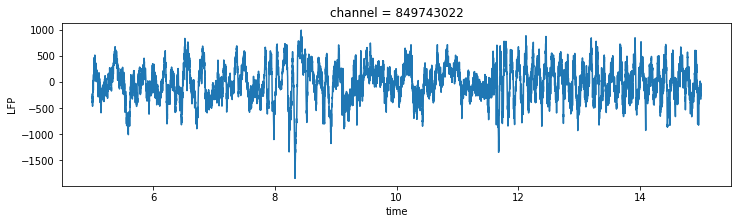

In [62]:
channel = lfp.channel[0]
subset = lfp.loc[dict(channel=channel, time=slice(5,15))]

plt.figure(figsize=(12,3))
subset.plot()

We might also want to visualize a specific frequency band by filtering. To do this we'll want to convert our data into standard numpy arrays for easier processing using the DataArray object's `values` property.

In [63]:
t = lfp.time.values
v = lfp.isel(channel=0).values

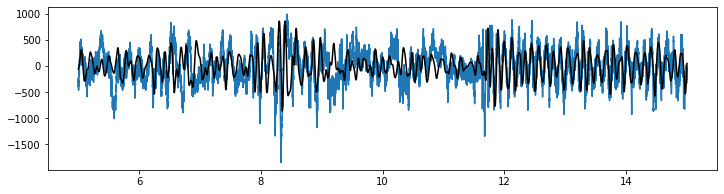

In [64]:
import scipy.signal
freq_window = (4, 15)
filt_order = 3
fs = 1/(t[1]-t[0])
b, a = scipy.signal.butter(filt_order, freq_window, btype='bandpass', fs=fs)
v_alpha = scipy.signal.lfilter(b, a, v)


window = [5, 15]
idx = np.logical_and(t>=window[0], t<window[1])
plt.figure(figsize=(12,3))
plt.plot(t[idx], v[idx])
plt.plot(t[idx], v_alpha[idx],'k')

## Spectral analysis


Next we're going to analyze some spectral properties of this signal using the `scipy.signal` library. "Spectral" refers to decomposing a signal into a sum of simpler components identified by their frequencies. The set of frequencies of the components forms a *spectrum* that tells us about the complete signal. You can see a full list of spectral analysis functions in scipy here: https://docs.scipy.org/doc/scipy/reference/signal.html#spectral-analysis

### Power spectral density (PSD)

We first import the package, and inspect the `periodogram` function, which estimates the size of the different frequency components of the signal.

** Note: maybe we want to compute this directly from an FFT? but only if that concept is already meaningful, so maybe not...**

In [65]:
import scipy.signal
help(scipy.signal.periodogram)

Help on function periodogram in module scipy.signal.spectral:

periodogram(x, fs=1.0, window='boxcar', nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)
    Estimate power spectral density using a periodogram.
    
    Parameters
    ----------
    x : array_like
        Time series of measurement values
    fs : float, optional
        Sampling frequency of the `x` time series. Defaults to 1.0.
    window : str or tuple or array_like, optional
        Desired window to use. If `window` is a string or tuple, it is
        passed to `get_window` to generate the window values, which are
        DFT-even by default. See `get_window` for a list of windows and
        required parameters. If `window` is array_like it will be used
        directly as the window and its length must be nperseg. Defaults
        to 'boxcar'.
    nfft : int, optional
        Length of the FFT used. If `None` the length of `x` will be
        used.
    detrend : str or function or `

There are a number of options that we won't go into here for refining the analysis. The one piece of information we do need is `fs`, the sampling frequency. If we used the default value `fs=1.0` our results would not match the true frequencies of the signal.

In [66]:
fs = 1/(t[1]-t[0])
window = [10, 100]
idx = np.logical_and(t>=window[0], t<window[1])

f, psd = scipy.signal.periodogram(v[idx], fs)

We'll plot the power spectrum on a semilog plot, since power can vary over many orders of magnitude across frequencies.

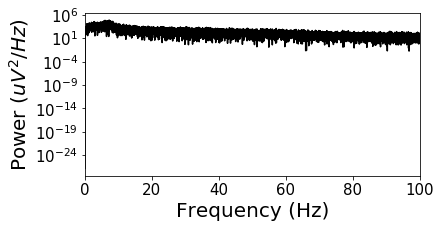

In [67]:
plt.figure(figsize=(6,3))
plt.semilogy(f,psd,'k')
plt.xlim((0,100))
plt.yticks(size=15)
plt.xticks(size=15)
plt.ylabel('Power ($uV^{2}/Hz$)',size=20)
plt.xlabel('Frequency (Hz)',size=20)
plt.show()

We see that this representation of the power spectrum is extremely noisy. Luckily, many people have come up with solutions to this problem. Scipy includes a function for Welch's method, which averages out noise by computing many estimates of the power spectrum from overlapping windows of the data. You can find some more references for this approach in the Scipy documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html#scipy.signal.welch

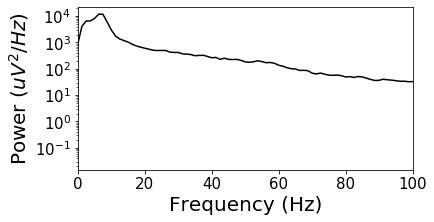

In [68]:
f, psd = scipy.signal.welch(v[idx], fs, nperseg=1000)

plt.figure(figsize=(6,3))
plt.semilogy(f,psd,'k')
plt.xlim((0,100))
plt.yticks(size=15)
plt.xticks(size=15)
plt.ylabel('Power ($uV^{2}/Hz$)',size=20)
plt.xlabel('Frequency (Hz)',size=20)
plt.show()

### Calculate and plot the time-frequency profile ("spectrogram")

We might also be interested in how the frequency content of the signal varies over time. In a neural context, power in different frequency bands is often linked to specific types of processing, so we might explore whether changes in the spectrum coincide with specific behaviors or stimuli.

The *spectrogram* is essentially an estimate of the power spectrum computed in a sliding time window, producing a 2D representation of the signal power across frequency and time.

In [69]:
window = [10, 20]
idx = np.where(np.logical_and(t>=window[0],t<window[1]))[0]

f, t_spec, spec = scipy.signal.spectrogram(v[idx], fs=fs, window='hanning',
                            nperseg=1000, noverlap=1000-1, mode='psd')
# Scipy assumes our signal starts at time=0, so we need to provide the offset
t_spec = t_spec + t[window[0]]

We'll use the matplotlib `pcolormesh` function to visualize this data as an image. We can pass this function grids of x and y coordinates to get the axis labeling right. We also log-transform the power spectrum and restrict to frequencies less than 100 Hz.

In [70]:
fmax = 80
x_mesh, y_mesh = np.meshgrid(t_spec, f[f<fmax])
plot_data = np.log10(spec[f<fmax])

We'll plot the spectrum together with the raw signal in subplots. Note that we explicitly set the x-axis limits to align the plots. (Alternatively, it's possible to directly couple the limits of different subplots.)

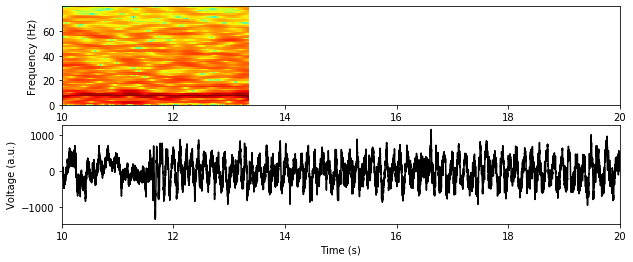

In [71]:
from matplotlib import cm
plt.figure(figsize=(10,4))

plt.subplot(2,1,1)
plt.pcolormesh(x_mesh, y_mesh, plot_data, cmap=cm.jet)
plt.xlim(window)
plt.ylabel('Frequency (Hz)')

plt.subplot(2,1,2)
plt.plot(t[idx], v[idx], 'k')
plt.xlim(window)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (a.u.)')
plt.show()

## Current source density (CSD) analysis

Physically, the LFP is made up of the electric fields from specific current sources (or sinks) in brain tissue, namely individual trans-membrane currents. Under certain simplifying assumptions, this transformation of spatial current distribution into field potential can be inverted to infer the distribution of currents underlying a measurement. This is called the current source density, or CSD. Spatial properties of the LFP are generally better studied in this representation.

We have pre-calculated estimates of CSD for each probe during a subset of stimulus presentations, which we access below. Note that the CSD array contains data for 186 channels (half the total), in contrast to the LFP which is only provided for approximately one quarter of the contacts.

In [72]:
csd = session.get_current_source_density(probe_id)
csd

<xarray.DataArray 'CSD' (channel: 160, time: 3250)>
array([[ 13094.963942,  17118.401442,  22821.526442, ...,  11493.401442,
         20243.401442, -15694.098558],
       [  1959.038462,   7818.413462,  -7728.461538, ...,  -3900.336538,
          4341.850962,   7505.913462],
       [-18226.610577, -18421.923077, -22289.110577, ...,   1382.764423,
          -531.298077,  18335.889423],
       ...,
       [ -1608.930288,   1906.694712,  -3952.680288, ...,   3391.069712,
           969.194712,  -2038.617788],
       [  3475.084135,   4021.959135,   2303.209135, ...,  -7813.978365,
         -9884.290865, -15079.603365],
       [ -3544.194712,  -6630.132212, -12372.319712, ...,  -2372.319712,
          2783.930288,   3174.555288]])
Coordinates:
  * channel  (channel) uint64 849743026 849743030 ... 849743658 849743662
  * time     (time) float64 -0.3 -0.2996 -0.2992 ... 0.9988 0.9992 0.9996

***Maybe move this elsewhere***

We can figure out where each LFP channel is located in the brain using the function `ecephys_session.intervals_structures`, which will identify channels that serve as reference points for the boundaries between identified brain regions.

In [75]:
# pass in the list of channels from the CSD
channels = session.channels.loc[csd.channel]
structure_acronyms, intervals = ecephys_session.intervals_structures(channels)
interval_midpoints = [ (aa + bb) / 2 for aa, bb in zip(intervals[:-1], intervals[1:])]
print(structure_acronyms)
print(interval_midpoints)

['TH' 'DG' 'CA' 'VIS' 'None']
[18.0, 47.0, 78.0, 115.5, 146.5]


<IPython.core.display.Javascript object>


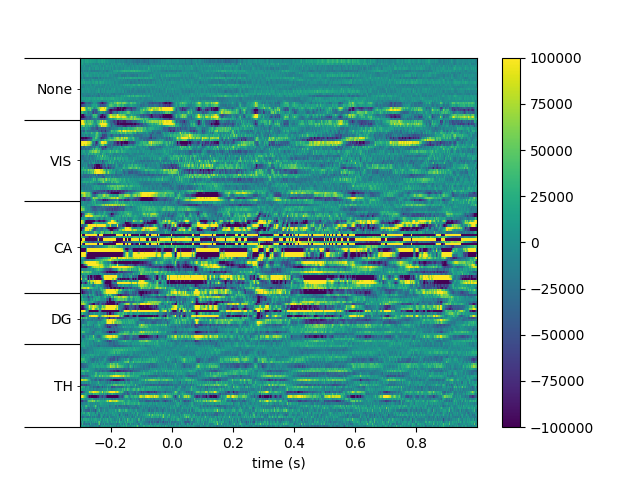

In [76]:
fig, ax = plt.subplots()

xmesh, ymesh = np.meshgrid(csd.time, range(len(csd.channel)))
plt.pcolormesh(xmesh, ymesh, csd, vmin=-1e5, vmax=1e5)
plt.colorbar(ax=ax)

ax.set_xlabel("time (s)")
ax.set_yticks(intervals)
ax.set_yticks(interval_midpoints, minor=True)
ax.set_yticklabels(structure_acronyms, minor=True)

# make the long divider lines between intervals
plt.tick_params("y", which="major", labelleft=False, length=40)
plt.show()

***Equivalent plot using xarray***

<IPython.core.display.Javascript object>


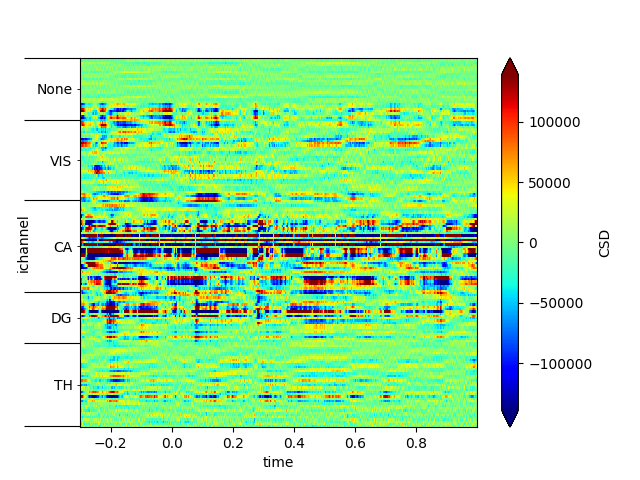

In [77]:
fig, ax = plt.subplots()
csd.coords['ichannel']=('channel',range(len(csd.channel)))
csd.plot(x='time', y='ichannel', robust=True, cmap=cm.jet)

ax.set_yticks(intervals)
plt.tick_params("y", which="major", labelleft=False, length=40)
ax.set_yticks(interval_midpoints, minor=True)
ax.set_yticklabels(structure_acronyms, minor=True)
plt.show()